# SALES DATA ANALYSIS ON COMMERCIAL STORE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sales=pd.read_csv('Sales Data.csv')
sales

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City,0.0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City,7.0
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City,18.0
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco,15.0
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta,12.0
...,...,...,...,...,...,...,...,...,...,...,...
112911,14045,292220,USB-C Charging Cable,1,11.95,2019-11-14 22:44:00,"292 Johnson St, New York City, NY 10001",11.0,11.95,New York City,22.0
112912,14046,292221,Apple Airpods Headphones,1,150.00,2019-11-28 10:27:00,"704 Meadow St, Los Angeles, CA 90001",11.0,150.00,Los Angeles,10.0
112913,14047,292222,Apple Airpods Headphones,1,150.00,2019-11-11 00:28:00,"903 West St, Seattle, WA 98101",11.0,150.00,Seattle,0.0
112914,14048,292223,Apple Airpods Headphones,1,150.00,2019-11-17 09:19:00,"916 8th St, New York City, NY 10001",11.0,150.00,New York City,9.0


In [3]:
sales.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112916 entries, 0 to 112915
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        112916 non-null  int64  
 1   Order ID          112916 non-null  int64  
 2   Product           112916 non-null  object 
 3   Quantity Ordered  112916 non-null  int64  
 4   Price Each        112916 non-null  float64
 5   Order Date        112915 non-null  object 
 6   Purchase Address  112915 non-null  object 
 7   Month             112915 non-null  float64
 8   Sales             112915 non-null  float64
 9   City              112915 non-null  object 
 10  Hour              112915 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 9.5+ MB


In [5]:
sales.isnull()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
112911,False,False,False,False,False,False,False,False,False,False,False
112912,False,False,False,False,False,False,False,False,False,False,False
112913,False,False,False,False,False,False,False,False,False,False,False
112914,False,False,False,False,False,False,False,False,False,False,False


In [6]:
pd.unique(sales['Quantity Ordered'])

array([1, 2, 4, 3, 7, 5, 6, 8])

In [7]:
sales.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
sales.describe()

,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,112916.000000,112916.000000,112916.000000,112915.000000,112915.000000,112915.000000
mean,228058.818130,1.124836,184.519720,6.858841,185.615695,14.418917
std,57128.480238,0.443468,332.817774,3.800903,333.048009,5.414467
min,150502.000000,1.000000,2.000000,1.000000,2.990000,0.000000
25%,177595.750000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,204627.500000,1.000000,14.950000,5.000000,14.950000,15.000000
75%,289106.250000,1.000000,150.000000,11.000000,150.000000,19.000000
max,319670.000000,8.000000,1700.000000,12.000000,3400.000000,23.000000


In [9]:
sales.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City,0.0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City,7.0
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City,18.0
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco,15.0
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta,12.0


In [10]:
sales.shape

(112916, 10)

In [11]:
sales = sales.drop_duplicates()

In [12]:
unique_products = sales['Product'].nunique()
unique_products

19

In [13]:
sales = sales.drop(['Month','Hour','Sales'], axis=1)

In [14]:
sales['sale_price'] = sales['Quantity Ordered'] * sales['Price Each']
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,sale_price
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",New York City,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",New York City,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",New York City,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",San Francisco,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",Atlanta,11.95
...,...,...,...,...,...,...,...,...
112911,292220,USB-C Charging Cable,1,11.95,2019-11-14 22:44:00,"292 Johnson St, New York City, NY 10001",New York City,11.95
112912,292221,Apple Airpods Headphones,1,150.00,2019-11-28 10:27:00,"704 Meadow St, Los Angeles, CA 90001",Los Angeles,150.00
112913,292222,Apple Airpods Headphones,1,150.00,2019-11-11 00:28:00,"903 West St, Seattle, WA 98101",Seattle,150.00
112914,292223,Apple Airpods Headphones,1,150.00,2019-11-17 09:19:00,"916 8th St, New York City, NY 10001",New York City,150.00


Assume cost is 70% of Price Each for Profit calculation

In [15]:
sales['Buying_cost'] = sales['Price Each'] * 0.7
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,sale_price,Buying_cost
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",New York City,1700.00,1190.000
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",New York City,600.00,420.000
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",New York City,11.95,8.365
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",San Francisco,149.99,104.993
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",Atlanta,11.95,8.365
...,...,...,...,...,...,...,...,...,...
112911,292220,USB-C Charging Cable,1,11.95,2019-11-14 22:44:00,"292 Johnson St, New York City, NY 10001",New York City,11.95,8.365
112912,292221,Apple Airpods Headphones,1,150.00,2019-11-28 10:27:00,"704 Meadow St, Los Angeles, CA 90001",Los Angeles,150.00,105.000
112913,292222,Apple Airpods Headphones,1,150.00,2019-11-11 00:28:00,"903 West St, Seattle, WA 98101",Seattle,150.00,105.000
112914,292223,Apple Airpods Headphones,1,150.00,2019-11-17 09:19:00,"916 8th St, New York City, NY 10001",New York City,150.00,105.000


finding profit of each product

In [16]:
sales['Profit'] = sales['sale_price'] - (sales['Buying_cost'] * sales['Quantity Ordered'])
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,sale_price,Buying_cost,Profit
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",New York City,1700.00,1190.000,510.000
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",New York City,600.00,420.000,180.000
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",New York City,11.95,8.365,3.585
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",San Francisco,149.99,104.993,44.997
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",Atlanta,11.95,8.365,3.585
...,...,...,...,...,...,...,...,...,...,...
112911,292220,USB-C Charging Cable,1,11.95,2019-11-14 22:44:00,"292 Johnson St, New York City, NY 10001",New York City,11.95,8.365,3.585
112912,292221,Apple Airpods Headphones,1,150.00,2019-11-28 10:27:00,"704 Meadow St, Los Angeles, CA 90001",Los Angeles,150.00,105.000,45.000
112913,292222,Apple Airpods Headphones,1,150.00,2019-11-11 00:28:00,"903 West St, Seattle, WA 98101",Seattle,150.00,105.000,45.000
112914,292223,Apple Airpods Headphones,1,150.00,2019-11-17 09:19:00,"916 8th St, New York City, NY 10001",New York City,150.00,105.000,45.000


In [17]:
sales.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'City', 'sale_price', 'Buying_cost', 'Profit'],
      dtype='object')

# Exploratory Data Analysis (EDA)

In [18]:
# Total Revenue
total_revenue = sales['sale_price'].sum()
total_revenue

20941205.449999996

In [19]:
# avg revenue
avg_revenue = sales['sale_price'].mean()
avg_revenue

185.7247232914131

**QUANTITY OF EACH PRODUCT ORDERED**

In [20]:
product_sales = sales.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
product_sales

,Quantity Ordered
Product,
AAA Batteries (4-pack),18992
AA Batteries (4-pack),16787
USB-C Charging Cable,14425
Lightning Charging Cable,14070
Wired Headphones,12456
Apple Airpods Headphones,9471
Bose SoundSport Headphones,8179
27in FHD Monitor,4530
iPhone,4180


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'AAA Batteries (4-pack)'),
  Text(1, 0, 'AA Batteries (4-pack)'),
  Text(2, 0, 'USB-C Charging Cable'),
  Text(3, 0, 'Lightning Charging Cable'),
  Text(4, 0, 'Wired Headphones'),
  Text(5, 0, 'Apple Airpods Headphones'),
  Text(6, 0, 'Bose SoundSport Headphones'),
  Text(7, 0, '27in FHD Monitor'),
  Text(8, 0, 'iPhone'),
  Text(9, 0, '34in Ultrawide Monitor'),
  Text(10, 0, '27in 4K Gaming Monitor'),
  Text(11, 0, 'Google Phone'),
  Text(12, 0, 'Flatscreen TV'),
  Text(13, 0, 'Macbook Pro Laptop'),
  Text(14, 0, 'ThinkPad Laptop'),
  Text(15, 0, '20in Monitor'),
  Text(16, 0, 'Vareebadd Phone'),
  Text(17, 0, 'LG Dryer'),
  Text(18, 0, 'LG Washing Machine')])

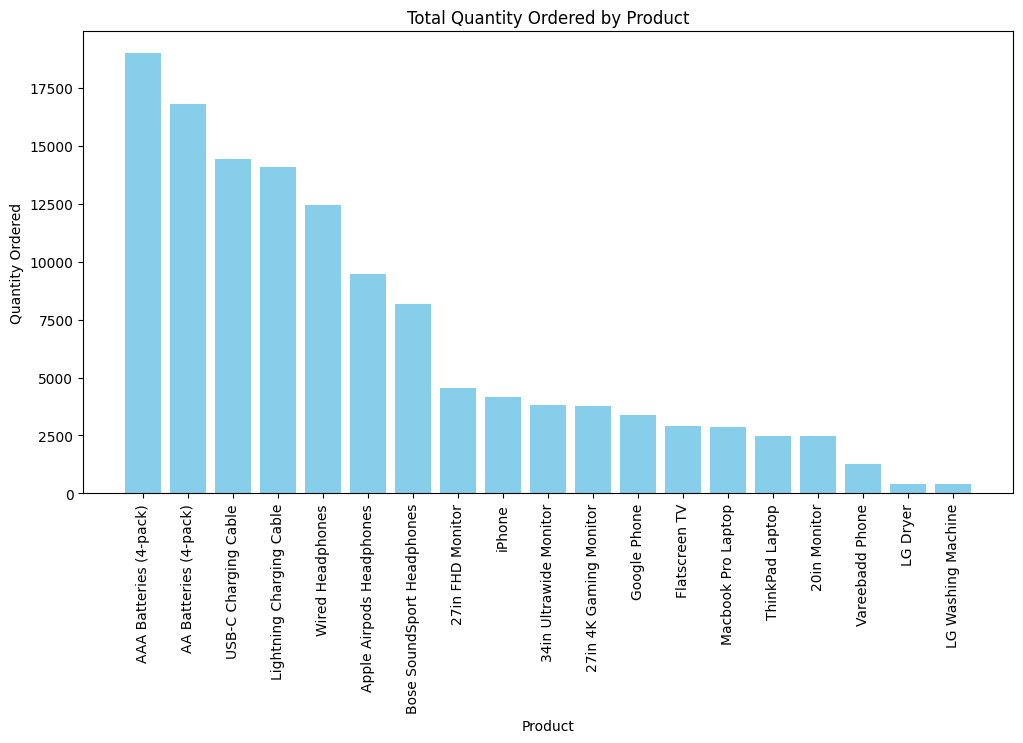

In [21]:
plt.figure(figsize=(12, 6))
plt.bar(product_sales.index, product_sales.values,color='skyblue')
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.title("Total Quantity Ordered by Product")
plt.xticks(rotation=90)

In [22]:
unique_products, total_quantity = sales['Product'].nunique(), sales['Quantity Ordered'].sum()
print(f"Unique products: {unique_products}, Total quantity: {total_quantity}")

Unique products: 19, Total quantity: 126848


**EACH PRODUCT AVAILABILITY**

In [23]:
product_counts = sales.groupby('Product').size().sort_values(ascending=False)
product_counts

,0
Product,
USB-C Charging Cable,13196
Lightning Charging Cable,13123
AAA Batteries (4-pack),12622
AA Batteries (4-pack),12471
Wired Headphones,11458
Apple Airpods Headphones,9401
Bose SoundSport Headphones,8101
27in FHD Monitor,4508
iPhone,4176


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Macbook Pro Laptop'),
  Text(1, 0, 'LG Washing Machine'),
  Text(2, 0, 'USB-C Charging Cable'),
  Text(3, 0, '27in FHD Monitor'),
  Text(4, 0, 'AA Batteries (4-pack)'),
  Text(5, 0, 'Bose SoundSport Headphones'),
  Text(6, 0, 'AAA Batteries (4-pack)'),
  Text(7, 0, 'ThinkPad Laptop'),
  Text(8, 0, 'Lightning Charging Cable'),
  Text(9, 0, 'Google Phone'),
  Text(10, 0, 'Wired Headphones'),
  Text(11, 0, 'Apple Airpods Headphones'),
  Text(12, 0, 'Vareebadd Phone'),
  Text(13, 0, 'iPhone'),
  Text(14, 0, '20in Monitor'),
  Text(15, 0, '34in Ultrawide Monitor'),
  Text(16, 0, 'Flatscreen TV'),
  Text(17, 0, '27in 4K Gaming Monitor'),
  Text(18, 0, 'LG Dryer')])

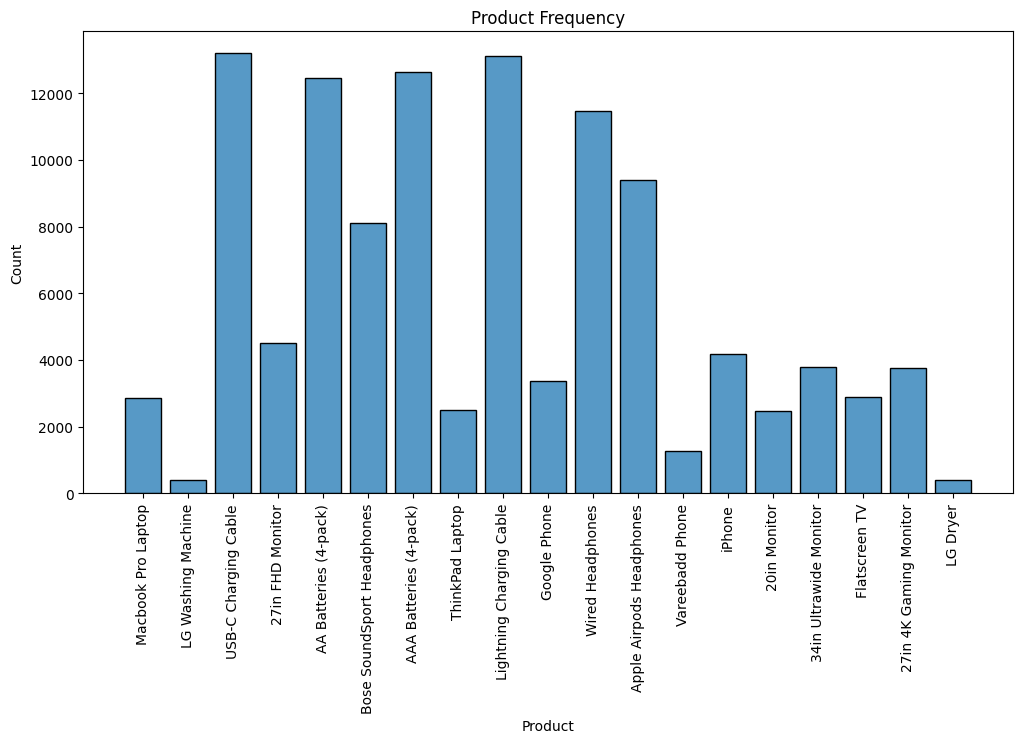

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(x=sales['Product'], data=sales, shrink=.8)
plt.xlabel("Product")
plt.ylabel("Count")
plt.title("Product Frequency")
plt.xticks(rotation=90)

**REVENUECONTRIBUTION BY PRODUCT CATEGORY**

In [25]:
product_revenue = sales.groupby('Product')['sale_price'].sum().sort_values(ascending=False)
product_revenue

,sale_price
Product,
Macbook Pro Laptop,4880700.00
iPhone,2926000.00
ThinkPad Laptop,2490975.09
Google Phone,2022000.00
27in 4K Gaming Monitor,1465582.42
34in Ultrawide Monitor,1446241.94
Apple Airpods Headphones,1420650.00
Flatscreen TV,868800.00
Bose SoundSport Headphones,817818.21


Text(0.5, 1.0, 'Product Revenue')

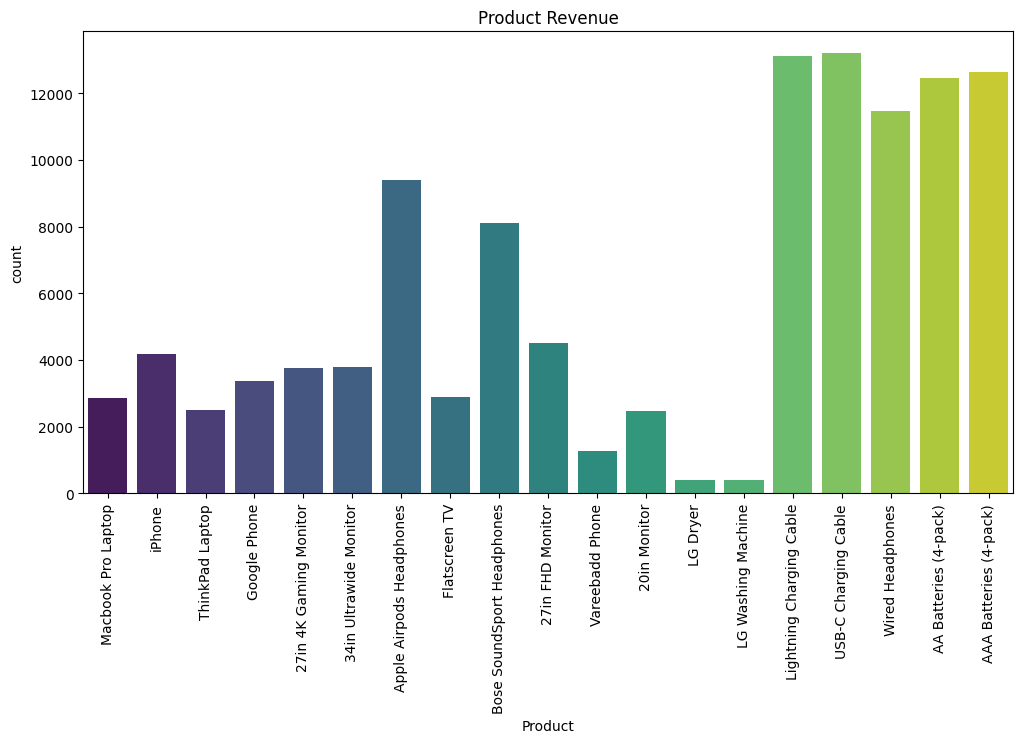

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Product', data=sales, order=product_revenue.index,palette='viridis')
plt.xticks(rotation=90)
plt.title("Product Revenue")

**QUANTITY OF DAILY ORDERES**

In [27]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
daily_sales = sales.groupby(sales['Order Date'].dt.date)['Quantity Ordered'].sum()
daily_sales

,Quantity Ordered
Order Date,
2019-02-01,452
2019-02-02,499
2019-02-03,447
2019-02-04,452
2019-02-05,432
...,...
2019-12-28,928
2019-12-29,953
2019-12-30,925


**QUANTITY OF WEEKLY ORDERES**

In [28]:
weekly_sales = sales.groupby(sales['Order Date'].dt.to_period('W'))['Quantity Ordered'].sum()
weekly_sales

,Quantity Ordered
Order Date,
2019-01-28/2019-02-03,1398
2019-02-04/2019-02-10,3292
2019-02-11/2019-02-17,3432
2019-02-18/2019-02-24,3394
2019-02-25/2019-03-03,3541
2019-03-04/2019-03-10,3840
2019-03-11/2019-03-17,3857
2019-03-18/2019-03-24,3857
2019-03-25/2019-03-31,3793


**QUANTITY OF MONTHLY ORDERES**

In [29]:
monthly_sales = sales.groupby(sales['Order Date'].dt.to_period('M'))['Quantity Ordered'].sum().sort_values(ascending=False)
monthly_sales

,Quantity Ordered
Order Date,
2019-12,28063
2019-04,20536
2019-05,18653
2019-03,16979
2019-11,15706
2019-02,13425
2019-08,13411
2020-01,41
2019-06,19


**ON WHICH MONTH PRODUCT SALE IS MORE**

In [30]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Month'] = sales['Order Date'].dt.month

monthly_top_products = sales.groupby(['Month', 'Product'])['Quantity Ordered'].sum().reset_index()
monthly_top_products = monthly_top_products.loc[monthly_top_products.groupby('Month')['Quantity Ordered'].idxmax()]

print(monthly_top_products[['Month', 'Product', 'Quantity Ordered']])

     Month                   Product  Quantity Ordered
8      1.0  Lightning Charging Cable                 6
20     2.0    AAA Batteries (4-pack)              1970
39     3.0    AAA Batteries (4-pack)              2477
58     4.0    AAA Batteries (4-pack)              2936
77     5.0    AAA Batteries (4-pack)              2923
95     6.0    AAA Batteries (4-pack)                 4
108    8.0    AAA Batteries (4-pack)              2016
126    9.0  Apple Airpods Headphones                 2
136   11.0    AAA Batteries (4-pack)              2420
155   12.0    AAA Batteries (4-pack)              4237


In [31]:
top_product_december = sales[sales['Order Date'].dt.month == 12].groupby('Product')['Quantity Ordered'].sum().idxmax()
top_product_december

'AAA Batteries (4-pack)'

In [32]:
top_product_december = sales[sales['Order Date'].dt.month == 12].groupby('Product')['Quantity Ordered'].sum().idxmax()
top_quantity_december = sales[sales['Order Date'].dt.month == 12].groupby('Product')['Quantity Ordered'].sum().max()
print(f"Top product in December: {top_product_december}, Quantity Ordered: {top_quantity_december}")

Top product in December: AAA Batteries (4-pack), Quantity Ordered: 4237


**ON WHICH MONTH PRODUCT SALE IS LESS**

In [33]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Month'] = sales['Order Date'].dt.month

monthly_LEAST_products = sales.groupby(['Month', 'Product'])['Quantity Ordered'].sum().reset_index()
monthly_LEAST_products = monthly_top_products.loc[monthly_top_products.groupby('Month')['Quantity Ordered'].idxmin()]

print(monthly_LEAST_products[['Month', 'Product', 'Quantity Ordered']])

     Month                   Product  Quantity Ordered
8      1.0  Lightning Charging Cable                 6
20     2.0    AAA Batteries (4-pack)              1970
39     3.0    AAA Batteries (4-pack)              2477
58     4.0    AAA Batteries (4-pack)              2936
77     5.0    AAA Batteries (4-pack)              2923
95     6.0    AAA Batteries (4-pack)                 4
108    8.0    AAA Batteries (4-pack)              2016
126    9.0  Apple Airpods Headphones                 2
136   11.0    AAA Batteries (4-pack)              2420
155   12.0    AAA Batteries (4-pack)              4237


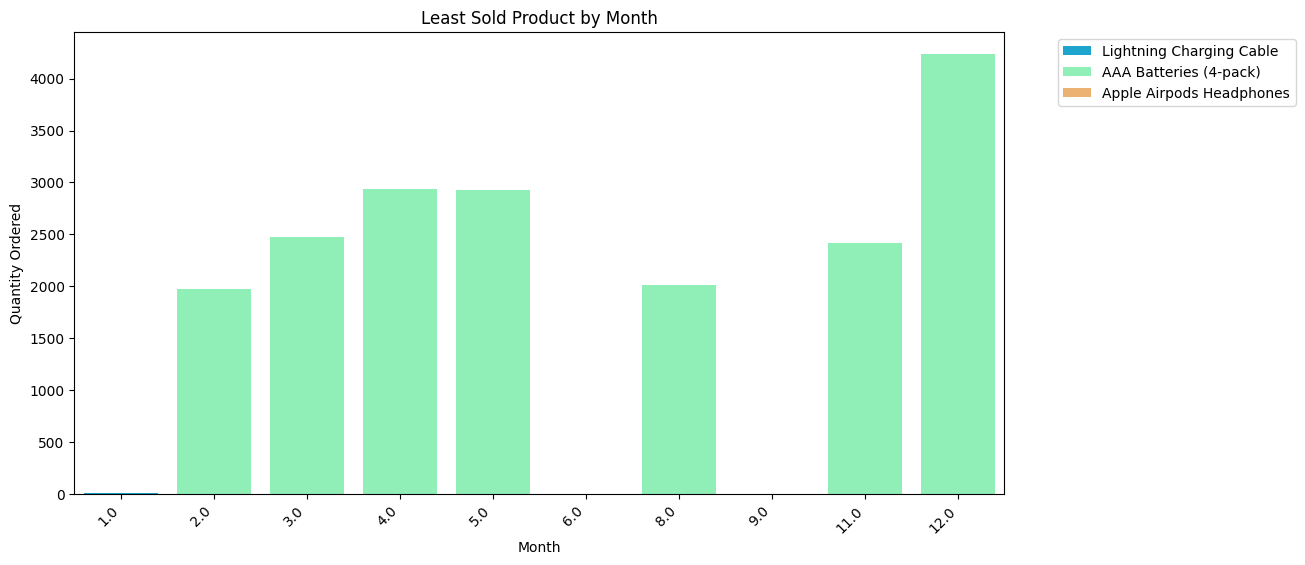

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Quantity Ordered', hue='Product', data=monthly_LEAST_products, palette='rainbow')
plt.title('Least Sold Product by Month')
plt.xlabel('Month')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

**MONTH WISE SALE PRODUCT AND QUANTITY OF ORDERED**

In [35]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
november_sales = sales[sales['Order Date'].dt.month == 11]
november_product_sales = november_sales.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

print(november_product_sales)


Product
AAA Batteries (4-pack)        2420
AA Batteries (4-pack)         2095
USB-C Charging Cable          1795
Lightning Charging Cable      1739
Wired Headphones              1549
Apple Airpods Headphones      1178
Bose SoundSport Headphones     983
27in FHD Monitor               566
iPhone                         524
27in 4K Gaming Monitor         444
34in Ultrawide Monitor         443
Google Phone                   389
Flatscreen TV                  368
Macbook Pro Laptop             357
20in Monitor                   340
ThinkPad Laptop                296
Vareebadd Phone                139
LG Washing Machine              42
LG Dryer                        39
Name: Quantity Ordered, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'AAA Batteries (4-pack)'),
  Text(1, 0, 'AA Batteries (4-pack)'),
  Text(2, 0, 'USB-C Charging Cable'),
  Text(3, 0, 'Lightning Charging Cable'),
  Text(4, 0, 'Wired Headphones'),
  Text(5, 0, 'Apple Airpods Headphones'),
  Text(6, 0, 'Bose SoundSport Headphones'),
  Text(7, 0, '27in FHD Monitor'),
  Text(8, 0, 'iPhone'),
  Text(9, 0, '27in 4K Gaming Monitor'),
  Text(10, 0, '34in Ultrawide Monitor'),
  Text(11, 0, 'Google Phone'),
  Text(12, 0, 'Flatscreen TV'),
  Text(13, 0, 'Macbook Pro Laptop'),
  Text(14, 0, '20in Monitor'),
  Text(15, 0, 'ThinkPad Laptop'),
  Text(16, 0, 'Vareebadd Phone'),
  Text(17, 0, 'LG Washing Machine'),
  Text(18, 0, 'LG Dryer')])

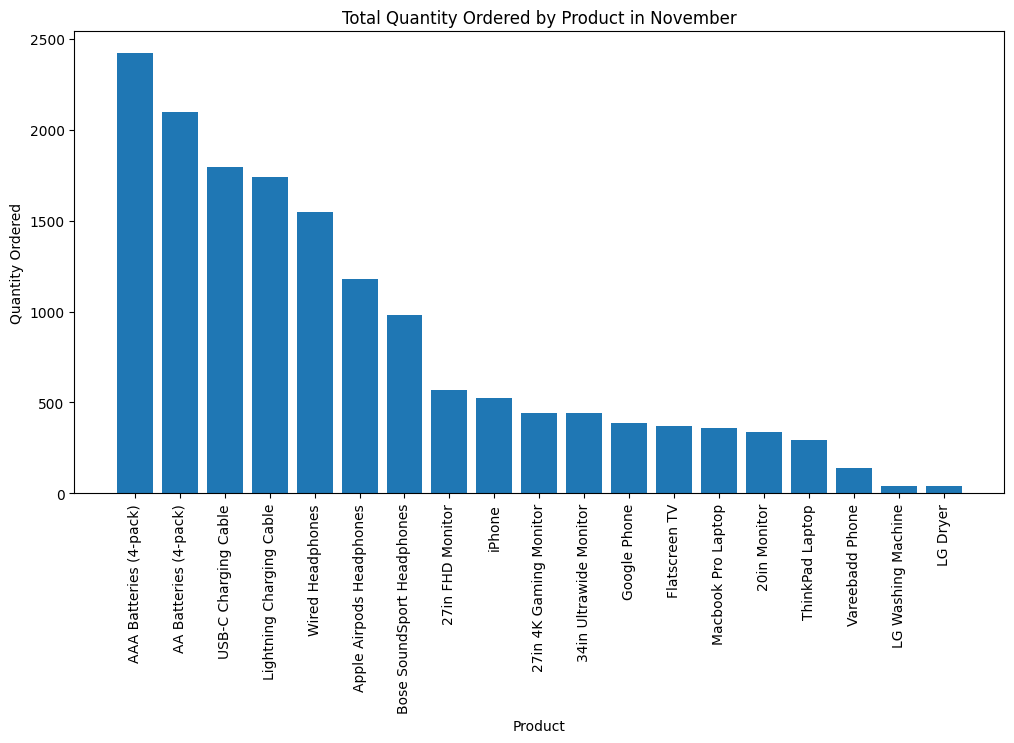

In [36]:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.bar(november_product_sales.index, november_product_sales.values)
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.title("Total Quantity Ordered by Product in November")
plt.xticks(rotation=90)

In [37]:
Least_product_december = sales[sales['Order Date'].dt.month == 12].groupby('Product')['Quantity Ordered'].sum().idxmin()
Least_product_december

'LG Washing Machine'

In [38]:
Least_product_december = sales[sales['Order Date'].dt.month == 12].groupby('Product')['Quantity Ordered'].sum().idxmin()
Least_quantity_december = sales[sales['Order Date'].dt.month == 12].groupby('Product')['Quantity Ordered'].sum().min()
print(f"Least product in December: {Least_product_december}, Quantity Ordered: {Least_quantity_december}")

Least product in December: LG Washing Machine, Quantity Ordered: 80


**MAXIMUM SALE DATE**

In [39]:
sales.groupby('Order Date')['Quantity Ordered'].sum().idxmax()

Timestamp('2019-12-18 11:32:00')

**MINIMUM SALE DATE**

In [40]:
sales.groupby('Order Date')['Quantity Ordered'].sum().idxmin()

Timestamp('2019-02-01 04:25:00')

**MAXIMUN SALE MONTH**

In [41]:
sales['Order Date'].dt.month_name().value_counts().idxmax()

'December'

**MINIMUM SALE MONTH**

In [42]:
sales['Order Date'].dt.month_name().value_counts().idxmin()

'September'

**MAXIMUM SALE WEEK**

In [43]:
max_weekly_sales = sales.groupby(sales['Order Date'].dt.to_period('W'))['Quantity Ordered'].sum().idxmax()
max_weekly_sales

Period('2019-12-23/2019-12-29', 'W-SUN')

**MINIMUM SALE WEEK**

In [44]:
max_weekly_sales = sales.groupby(sales['Order Date'].dt.to_period('W'))['Quantity Ordered'].sum().idxmin()
max_weekly_sales

Period('2019-01-28/2019-02-03', 'W-SUN')

**PROFIT FROM EACH PRODUCT**

In [45]:
product_profit = sales.groupby('Product')['Profit'].sum().sort_values(ascending=False)
product_profit

,Profit
Product,
Macbook Pro Laptop,1464210.000
iPhone,877800.000
ThinkPad Laptop,747292.527
Google Phone,606600.000
27in 4K Gaming Monitor,439674.726
34in Ultrawide Monitor,433872.582
Apple Airpods Headphones,426195.000
Flatscreen TV,260640.000
Bose SoundSport Headphones,245345.463


**MONTHLY WISE PROFIT**

In [46]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Month'] = sales['Order Date'].dt.month
monthly_profit = sales.groupby('Month')['Profit'].sum().sort_values(ascending=False)
monthly_profit

,Profit
Month,
12.0,1382416.911
4.0,1016765.394
5.0,945184.869
3.0,841492.005
11.0,761331.207
8.0,671679.318
2.0,659498.820
1.0,2601.087
6.0,761.202


**WEEKLY WISE PROFIT**

In [47]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
weekly_profit = sales.groupby(sales['Order Date'].dt.to_period('W'))['Profit'].sum().sort_values(ascending=False)
print(weekly_profit)

Order Date
2019-12-16/2019-12-22    322326.747
2019-12-02/2019-12-08    314135.472
2019-12-09/2019-12-15    311400.282
2019-12-23/2019-12-29    305199.948
2019-04-22/2019-04-28    242608.404
2019-04-15/2019-04-21    241589.235
2019-04-01/2019-04-07    232347.891
2019-04-29/2019-05-05    229338.786
2019-04-08/2019-04-14    228436.266
2019-05-06/2019-05-12    218792.997
2019-05-20/2019-05-26    212935.365
2019-05-13/2019-05-19    208689.564
2019-03-25/2019-03-31    201261.888
2019-11-25/2019-12-01    192537.183
2019-03-04/2019-03-10    192148.914
2019-03-18/2019-03-24    188718.165
2019-11-04/2019-11-10    182719.791
2019-11-18/2019-11-24    181169.028
2019-03-11/2019-03-17    178731.321
2019-02-25/2019-03-03    173491.932
2019-11-11/2019-11-17    171129.363
2019-02-11/2019-02-17    170459.784
2019-02-04/2019-02-10    169590.015
2019-08-05/2019-08-11    165168.093
2019-02-18/2019-02-24    160562.253
2019-05-27/2019-06-02    147972.957
2019-08-12/2019-08-18    147878.544
2019-08-19/2019-0

**PROFIT FROM EACH CITY**

In [48]:
city_orders = sales.groupby('City')['Profit'].sum().sort_values(ascending=False)
city_orders

,Profit
City,
San Francisco,1525324.221
Los Angeles,975790.728
New York City,851384.943
Boston,667440.837
Dallas,505858.341
Atlanta,502578.405
Seattle,496642.476
Portland,427979.328
Austin,329360.556


Text(0.5, 1.0, 'Total Profit by City')

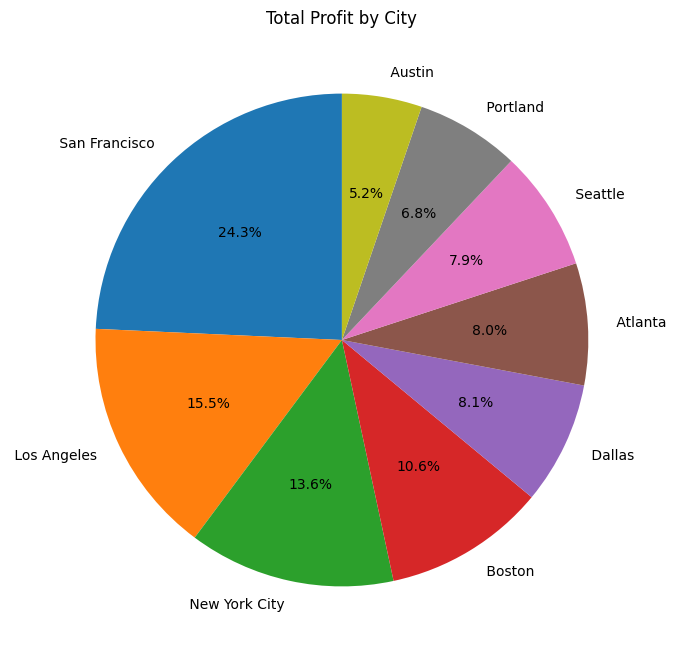

In [49]:
plt.figure(figsize=(8, 8))
plt.pie(city_orders.values, labels=city_orders.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Profit by City')

**QUANTITY OF EACH ORDERES**

In [50]:
city_orders = sales.groupby('City')['Quantity Ordered'].sum().sort_values(ascending=False)
city_orders

,Quantity Ordered
City,
San Francisco,30517
Los Angeles,20091
New York City,17004
Boston,13632
Dallas,10201
Atlanta,10062
Seattle,10015
Portland,8600
Austin,6723


**EACH CITY ORDERED WHICH PRODUCT MORE**

In [51]:
city_product_sales = sales.groupby(['City', 'Product'])['Quantity Ordered'].sum().reset_index()
max_city_product = city_product_sales.loc[city_product_sales.groupby('City')['Quantity Ordered'].idxmax()]
max_city_product

,City,Product,Quantity Ordered
5,Atlanta,AAA Batteries (4-pack),1443
24,Austin,AAA Batteries (4-pack),993
43,Boston,AAA Batteries (4-pack),2102
62,Dallas,AAA Batteries (4-pack),1600
81,Los Angeles,AAA Batteries (4-pack),3036
100,New York City,AAA Batteries (4-pack),2474
119,Portland,AAA Batteries (4-pack),1260
138,San Francisco,AAA Batteries (4-pack),4588
157,Seattle,AAA Batteries (4-pack),1493


**EACH CITY ORDERED WHICH PRODUCT LESS**

In [52]:
city_product_sales = sales.groupby(['City', 'Product'])['Quantity Ordered'].sum().reset_index()
min_city_product = city_product_sales.loc[city_product_sales.groupby('City')['Quantity Ordered'].idxmin()]
min_city_product

,City,Product,Quantity Ordered
11,Atlanta,LG Washing Machine,27
30,Austin,LG Washing Machine,18
48,Boston,LG Dryer,35
67,Dallas,LG Dryer,33
87,Los Angeles,LG Washing Machine,67
106,New York City,LG Washing Machine,47
124,Portland,LG Dryer,24
143,San Francisco,LG Dryer,85
163,Seattle,LG Washing Machine,26


In [53]:
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,sale_price,Buying_cost,Profit,Month
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",New York City,1700.00,1190.000,510.000,12.0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",New York City,600.00,420.000,180.000,12.0
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",New York City,11.95,8.365,3.585,12.0
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",San Francisco,149.99,104.993,44.997,12.0
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",Atlanta,11.95,8.365,3.585,12.0
...,...,...,...,...,...,...,...,...,...,...,...
112911,292220,USB-C Charging Cable,1,11.95,2019-11-14 22:44:00,"292 Johnson St, New York City, NY 10001",New York City,11.95,8.365,3.585,11.0
112912,292221,Apple Airpods Headphones,1,150.00,2019-11-28 10:27:00,"704 Meadow St, Los Angeles, CA 90001",Los Angeles,150.00,105.000,45.000,11.0
112913,292222,Apple Airpods Headphones,1,150.00,2019-11-11 00:28:00,"903 West St, Seattle, WA 98101",Seattle,150.00,105.000,45.000,11.0
112914,292223,Apple Airpods Headphones,1,150.00,2019-11-17 09:19:00,"916 8th St, New York City, NY 10001",New York City,150.00,105.000,45.000,11.0


# DATA VISUALIZATION

**PRODUCT COUNTS**

Text(0.5, 1.0, 'Product Counts')

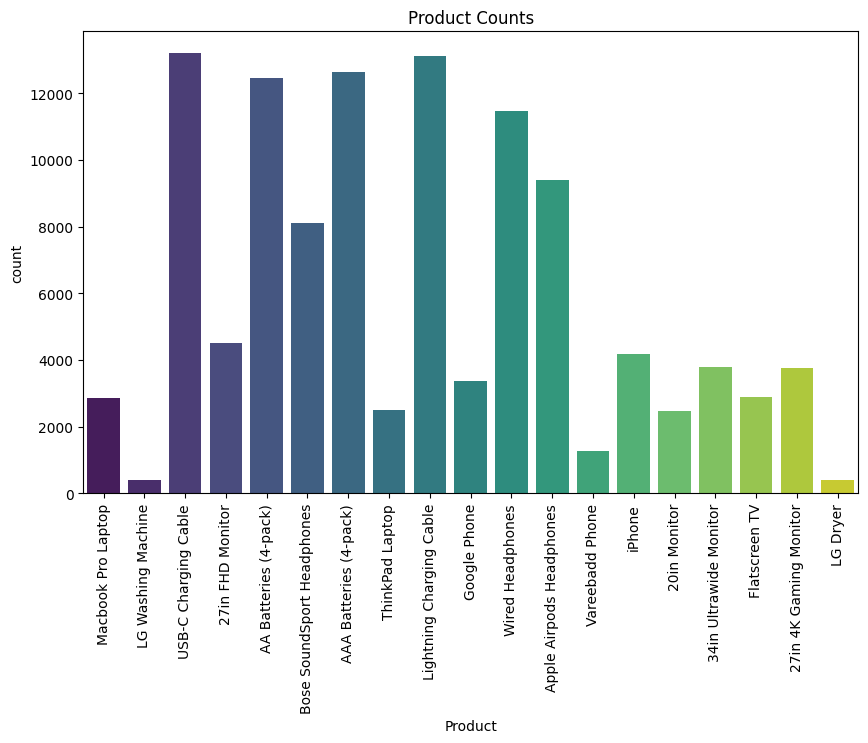

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Product', data=sales, palette='viridis')
plt.xticks(rotation=90)
plt.title('Product Counts')

**DISTRIBUTION OF QUANTITY ORDERED**

Text(0.5, 1.0, 'Distribution of Quantity Ordered')

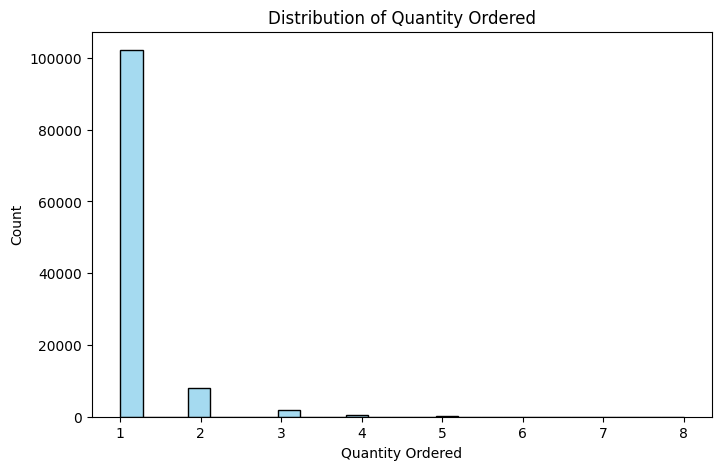

In [55]:
plt.figure(figsize=(8, 5))
sns.histplot(sales['Quantity Ordered'], bins=25, color='skyblue')
plt.title('Distribution of Quantity Ordered')


**DENSITY OF EACH PRICE**

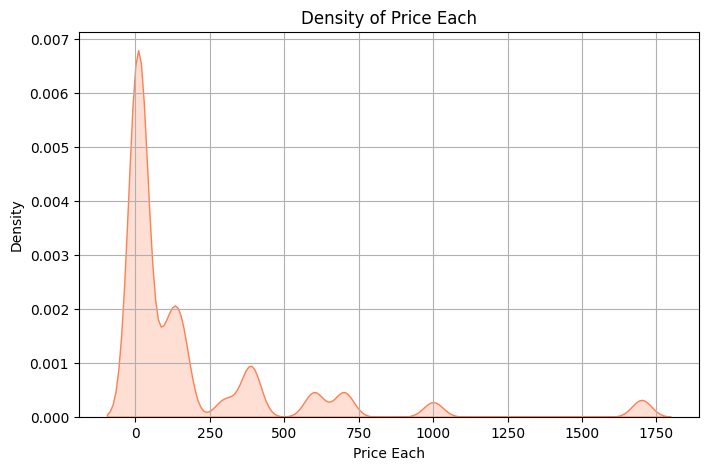

In [56]:
plt.figure(figsize=(8, 5))
sns.kdeplot(sales['Price Each'], color='coral',fill=True)
plt.title('Density of Price Each')
plt.grid()

**PROFIT DISTRIBUTION BY CITY**

Text(0.5, 1.0, 'Profit Distribution by City')

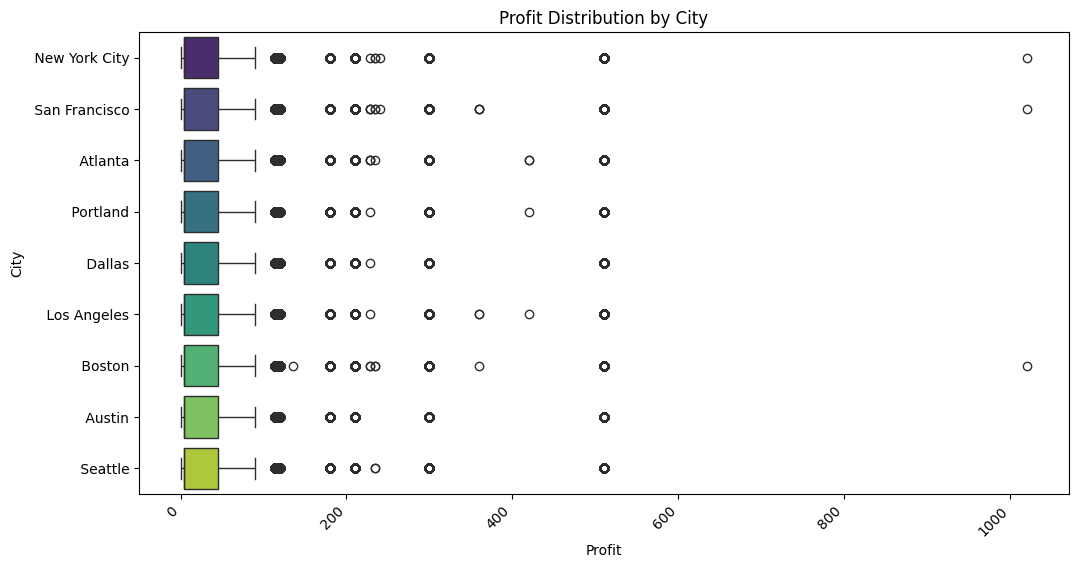

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Profit', y='City', data=sales, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Profit Distribution by City')

**RELATIONSHIP B/W SALE PRICE AND PROFIT BY CITY**

Text(0, 0.5, 'Profit')

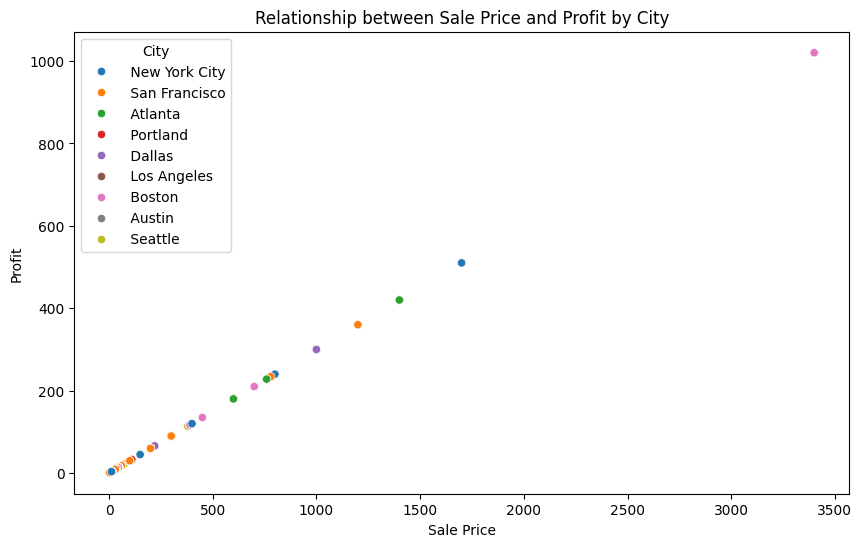

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sale_price', y='Profit', data=sales, hue='City')
plt.title('Relationship between Sale Price and Profit by City')
plt.xlabel('Sale Price')
plt.ylabel('Profit')

**QUANTITY ORDERED BY PRODUCT**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'AAA Batteries (4-pack)'),
  Text(1, 0, 'AA Batteries (4-pack)'),
  Text(2, 0, 'USB-C Charging Cable'),
  Text(3, 0, 'Lightning Charging Cable'),
  Text(4, 0, 'Wired Headphones'),
  Text(5, 0, 'Apple Airpods Headphones'),
  Text(6, 0, 'Bose SoundSport Headphones'),
  Text(7, 0, '27in FHD Monitor'),
  Text(8, 0, 'iPhone'),
  Text(9, 0, '34in Ultrawide Monitor'),
  Text(10, 0, '27in 4K Gaming Monitor'),
  Text(11, 0, 'Google Phone'),
  Text(12, 0, 'Flatscreen TV'),
  Text(13, 0, 'Macbook Pro Laptop'),
  Text(14, 0, 'ThinkPad Laptop'),
  Text(15, 0, '20in Monitor'),
  Text(16, 0, 'Vareebadd Phone'),
  Text(17, 0, 'LG Dryer'),
  Text(18, 0, 'LG Washing Machine')])

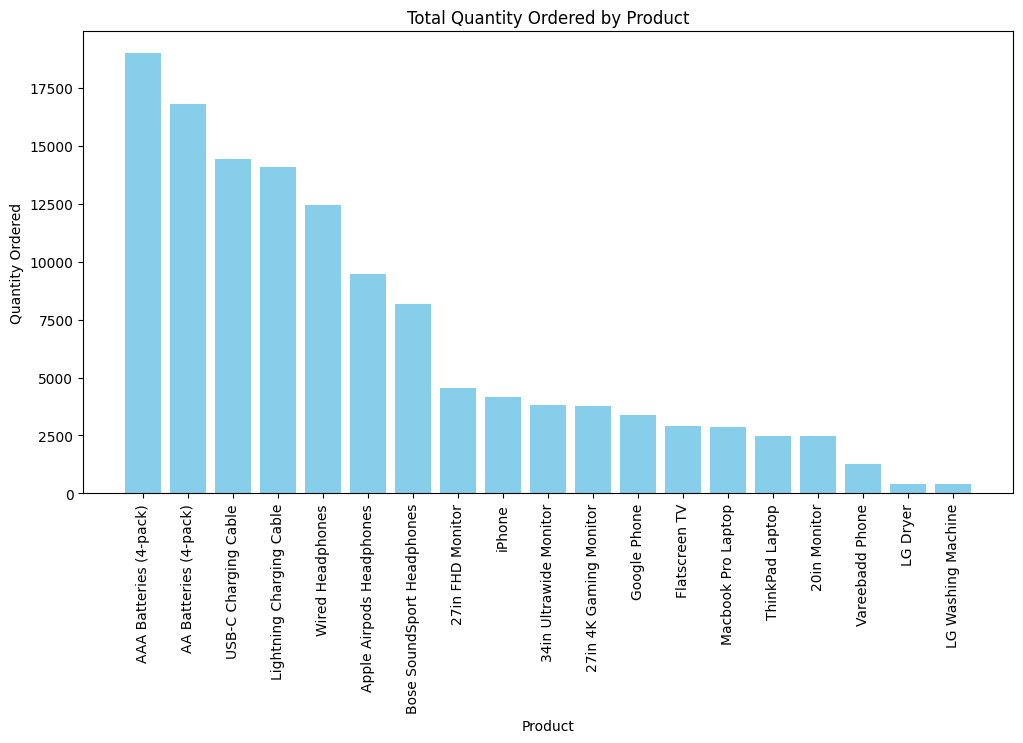

In [59]:
plt.figure(figsize=(12, 6))
plt.bar(product_sales.index, product_sales.values,color='skyblue')
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.title("Total Quantity Ordered by Product")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Relationship between Quantity Ordered and Sale Price by City')

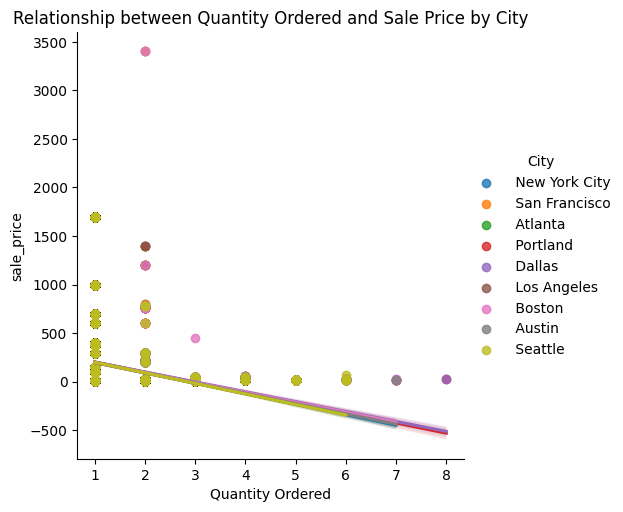

In [60]:
sns.lmplot(x='Quantity Ordered', y='sale_price', hue='City', data=sales)
plt.title('Relationship between Quantity Ordered and Sale Price by City')

**PRODUCT SALES DISTRIBUTION**

Text(0.5, 1.0, 'Product Sales Distribution')

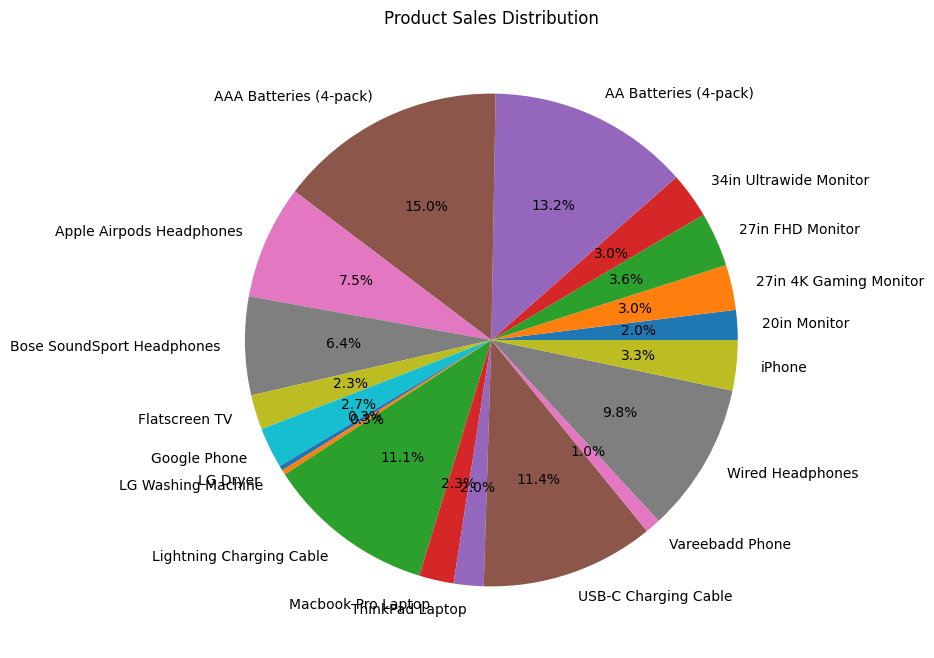

In [61]:
product_sales = sales.groupby('Product')['Quantity Ordered'].sum()
plt.figure(figsize=(8, 8))
plt.pie(product_sales, labels=product_sales.index, autopct='%1.1f%%')
plt.title('Product Sales Distribution')


**SALES BY CITY**

Text(0.5, 1.0, 'Total Sales by City')

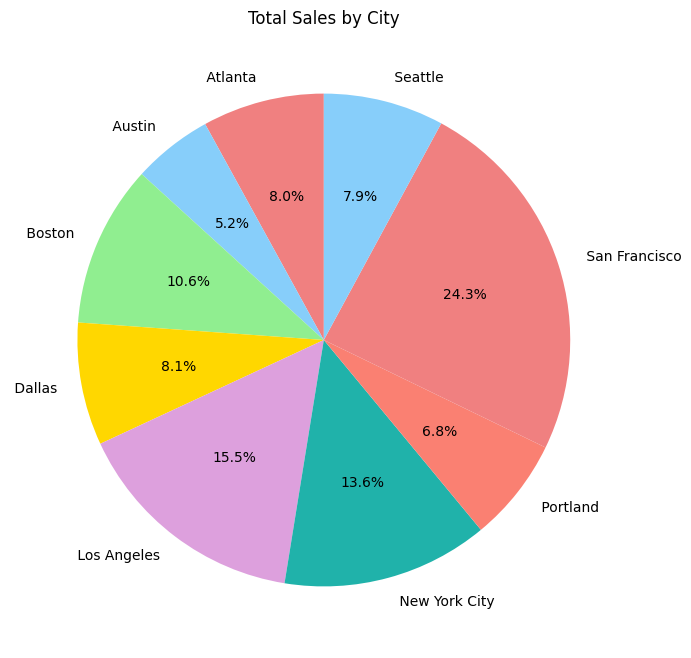

In [62]:
city_sales = sales.groupby('City')['sale_price'].sum()

num_cities = len(city_sales)

plt.figure(figsize=(8, 8))
plt.pie(city_sales, labels=city_sales.index, autopct='%1.1f%%', startangle=90,
        colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold', 'plum', 'lightseagreen', 'salmon'])
plt.title('Total Sales by City')

Text(0.5, 1.0, 'Correlation Matrix')

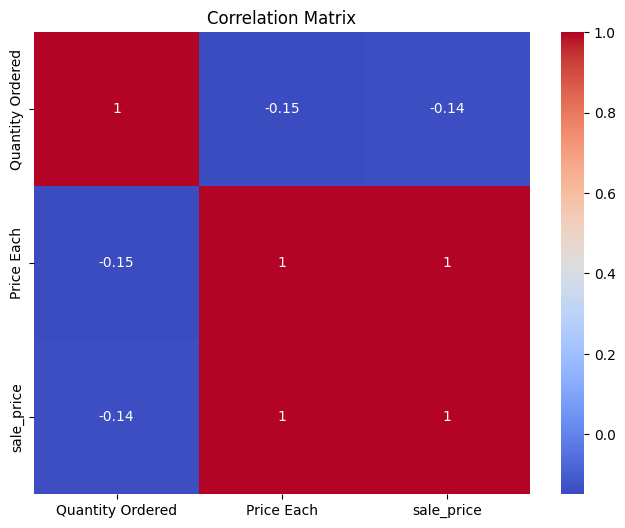

In [63]:
correlation_matrix = sales[['Quantity Ordered', 'Price Each', 'sale_price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

**QUANTITY ORDERED BY CITY AND PRODUCT**

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 [Text(0.5, 0, '20in Monitor'),
  Text(1.5, 0, '27in 4K Gaming Monitor'),
  Text(2.5, 0, '27in FHD Monitor'),
  Text(3.5, 0, '34in Ultrawide Monitor'),
  Text(4.5, 0, 'AA Batteries (4-pack)'),
  Text(5.5, 0, 'AAA Batteries (4-pack)'),
  Text(6.5, 0, 'Apple Airpods Headphones'),
  Text(7.5, 0, 'Bose SoundSport Headphones'),
  Text(8.5, 0, 'Flatscreen TV'),
  Text(9.5, 0, 'Google Phone'),
  Text(10.5, 0, 'LG Dryer'),
  Text(11.5, 0, 'LG Washing Machine'),
  Text(12.5, 0, 'Lightning Charging Cable'),
  Text(13.5, 0, 'Macbook Pro Laptop'),
  Text(14.5, 0, 'ThinkPad Laptop'),
  Text(15.5, 0, 'USB-C Charging Cable'),
  Text(16.5, 0, 'Vareebadd Phone'),
  Text(17.5, 0, 'Wired Headphones'),
  Text(18.5, 0, 'iPhone')])

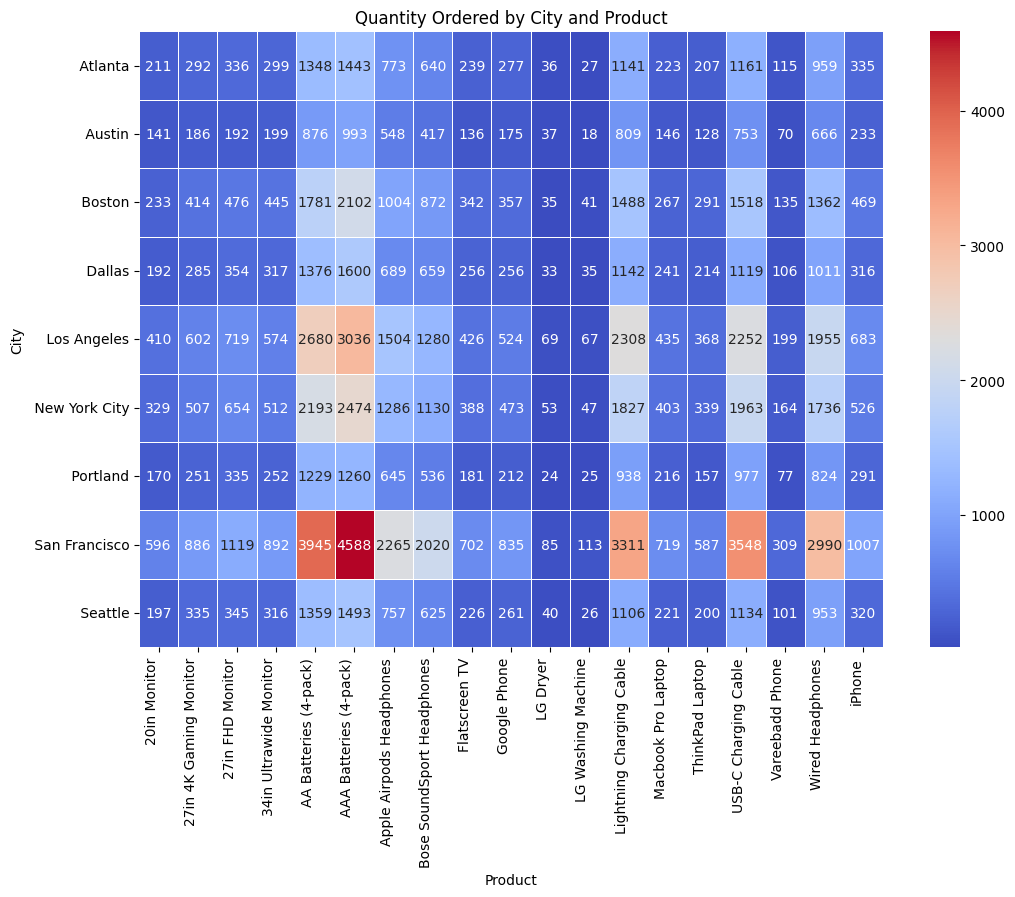

In [64]:
city_product_sales = pd.pivot_table(sales, values='Quantity Ordered', index='City', columns='Product', aggfunc='sum', fill_value=0)


plt.figure(figsize=(12, 8))
sns.heatmap(city_product_sales, cmap='coolwarm', annot=True, fmt=".0f", linewidths=.5)
plt.title('Quantity Ordered by City and Product')
plt.xticks(rotation=90, ha='right')


# Conclusion


* **Revenue:** Some products like 'Macbook Pro Laptop', 'iPhone', and 'ThinkPad Laptop' generate significantly higher revenue compared to others. These are likely high-priced or popular items.
* **Quantity:** Products like 'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', and 'USB-C Charging Cable' are sold in larger quantities, indicating high demand or frequent purchases.
* **Profitability:** Analyze profit margins for each product to identify the most and least profitable items. Consider factors like buying cost and selling price to optimize pricing strategies.
* **Monthly Sales:** There might be seasonal trends in sales, with some months showing higher order volumes. Identify peak seasons to adjust inventory and marketing efforts accordingly.
* **Pricing:** Products with higher prices may generate more revenue, but consider the impact on sales volume. Optimize pricing strategies to balance revenue and demand.




 **RECOMMENDATIONS**

* **Focus on high-revenue and high-profit products:**  Allocate resources and marketing efforts towards products that generate the most revenue and profit.
* **Optimize pricing:** Adjust pricing strategies based on product performance, demand, and competitor analysis.
* **Target high-performing cities:** Focus marketing and distribution efforts on cities with the highest sales volume.











